# Project 1

Cloth Company whether to focus their effort on mobile app or on website?
(Regression Problem)
# Algorithm Used:
- Linear Regression Algorithm
- Decision Tree Algorithm
- Random Forest Algorithm

# Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

# Load the DataSet

In [2]:
d=pd.read_csv('Ecommerce Customers')

In [3]:
d.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


# Information about Data

In [4]:
d.shape

(500, 8)

In [5]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


# Analyzing the Data

<AxesSubplot:>

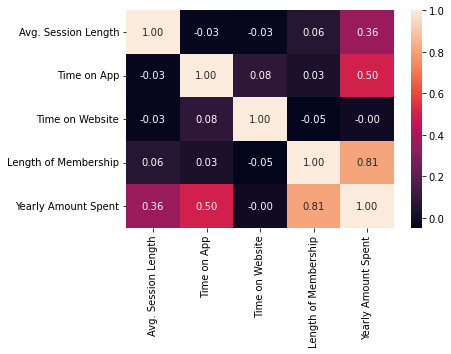

In [6]:
sns.heatmap(d.corr(), annot=True, fmt='.2f')

In [7]:
d.corr()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time on App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time on Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length of Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly Amount Spent,0.355088,0.499328,-0.002641,0.809084,1.000000


Yearly amount spent and length of Membership is highly correlated

In [8]:
d.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

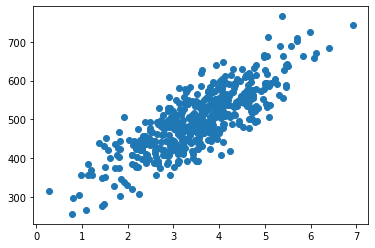

In [9]:
plt.scatter(x= 'Length of Membership',y='Yearly Amount Spent',data=d)

# Feature Selection

In [10]:
y=d['Yearly Amount Spent']
x=d[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]

# Splitting The Data

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=101)

# Data Modelling

# 1.Linear Regression algorithm

In [13]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [14]:
print(lm.coef_)

[26.02948861 38.70983485  0.35618404 61.47280903]


In [15]:
predictions=lm.predict(x_test)

Text(0.5, 0, 'Y test')

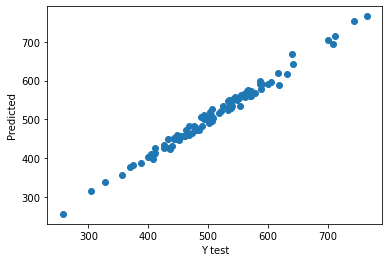

In [16]:
plt.scatter(y_test, predictions)
plt.ylabel('Predicted')
plt.xlabel('Y test')

In [17]:
pd.DataFrame(lm.coef_ , x.columns, columns=['Coeffecient'])

,Coeffecient
Avg. Session Length,26.029489
Time on App,38.709835
Time on Website,0.356184
Length of Membership,61.472809


# Evaluation

In [18]:
import sklearn.metrics as metrics
print('MAE: {}'.format(metrics.mean_absolute_error(y_test, predictions)))
print('MSE: {}'.format(metrics.mean_squared_error(y_test, predictions)))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, predictions))))
from sklearn.metrics import r2_score
r2_score(y_test,predictions)

MAE: 7.758907540457838
MSE: 91.82335857016865
RMSE: 9.582450551407435


0.9881661299145554

# 2.Decision Tree Algorithm

In [19]:
from sklearn.tree import DecisionTreeRegressor

In [20]:
t=DecisionTreeRegressor()

In [21]:
#training the data
t.fit(x_train, y_train)

DecisionTreeRegressor()

In [22]:
pred = t.predict(x_test)

In [23]:
score=t.score(x_test,y_test)
score

0.8907366885044847

# Evaluation

In [24]:
print('MAE: {}'.format(metrics.mean_absolute_error(y_test, pred)))
print('MSE: {}'.format(metrics.mean_squared_error(y_test, pred)))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, pred))))
from sklearn.metrics import r2_score
r2_score(y_test,pred)

MAE: 23.005546330161227
MSE: 847.8142955411531
RMSE: 29.117250823887083


0.8907366885044847

# 3.Random Forest

In [25]:
from sklearn.ensemble import RandomForestRegressor
r =RandomForestRegressor()

In [26]:
r.fit(x_train, y_train)

RandomForestRegressor()

In [27]:
pred = r.predict(x_test)

# Evaluation

In [28]:
print('MAE: {}'.format(metrics.mean_absolute_error(y_test, pred)))
print('MSE: {}'.format(metrics.mean_squared_error(y_test, pred)))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, pred))))
from sklearn.metrics import r2_score
r2_score(y_test,pred)

MAE: 15.376769101619765
MSE: 477.9463599929613
RMSE: 21.86198435625095


0.9384039614751651

# Conclusion

The greater the value of the coefficient the more it is related to target variable
So the Company should focus on mobile app

Linear Regression works better than Decision Tree and Random forest